<a href="https://colab.research.google.com/github/Darshan0805/ML_LAB/blob/main/Linear_Reression_Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ins_dt = pd.read_csv('/content/insurance - insurance.csv')
ins_dt

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
ins_dt.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
categorical_features = ins_dt[['sex','smoker','region']]
numerical_features = ins_dt[['age','bmi','children','charges']]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_features.columns:
  categorical_features[col] = le.fit_transform(categorical_features[col])

<ipython-input-10-b37d164ac357>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_features[col] = le.fit_transform(categorical_features[col])
<ipython-input-10-b37d164ac357>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_features[col] = le.fit_transform(categorical_features[col])
<ipython-input-10-b37d164ac357>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [ ]:
numerical_features

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [ ]:
categorical_features

,sex,smoker,region
0,0,1,3
1,1,0,2
2,1,0,2
3,1,0,1
4,1,0,1
...,...,...,...
1333,1,0,1
1334,0,0,0
1335,0,0,2
1336,0,0,3


In [ ]:
df_fin = pd.concat([numerical_features, categorical_features], axis=1, join="inner")
df_fin

,age,bmi,children,charges,sex,smoker,region
0,19,27.900,0,16884.92400,0,1,3
1,18,33.770,1,1725.55230,1,0,2
2,28,33.000,3,4449.46200,1,0,2
3,33,22.705,0,21984.47061,1,0,1
4,32,28.880,0,3866.85520,1,0,1
...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1
1334,18,31.920,0,2205.98080,0,0,0
1335,18,36.850,0,1629.83350,0,0,2
1336,21,25.800,0,2007.94500,0,0,3


In [ ]:
X = df_fin.drop(columns='charges')
Y = df_fin['charges']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
predictions = model.predict(X_test)
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(Y_test, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 3930.333273901141


In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, predictions)
print(f"Mean Squared Error (MSE): {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 31845929.13415944
Root Mean Squared Error (RMSE): 5643.219748880902


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(Y_test, predictions)
print(f"R-squared (R2) Score: {r2}")

R-squared (R2) Score: 0.7998747145449959


In [ ]:
rss = np.sum((Y_test - predictions) ** 2)
print(f"Residual Sum of Squares (RSS): {rss}")

from sklearn.metrics import explained_variance_score

explained_variance = explained_variance_score(Y_test, predictions)
print(f"Explained Variance Score: {explained_variance}")

Residual Sum of Squares (RSS): 8534709007.954729
Explained Variance Score: 0.8001434788960331


[  253.99185244   328.40261701   443.72929547   -24.32455098
 23568.87948381  -288.50857254]


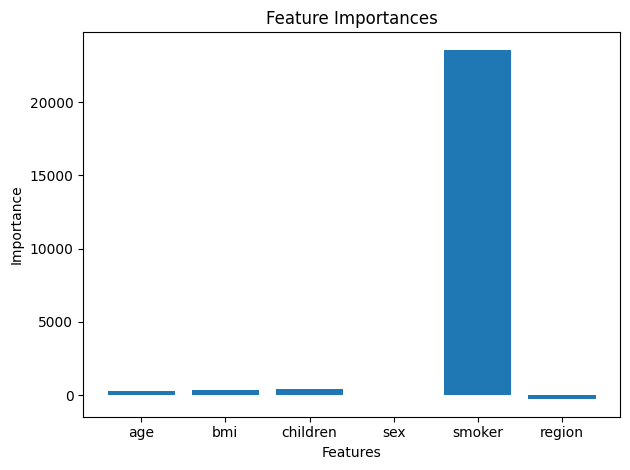

In [ ]:
print(model.coef_)

importances = model.coef_
feature_names = X_train.columns

plt.bar(feature_names, importances)
plt.title("Feature Importances")
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

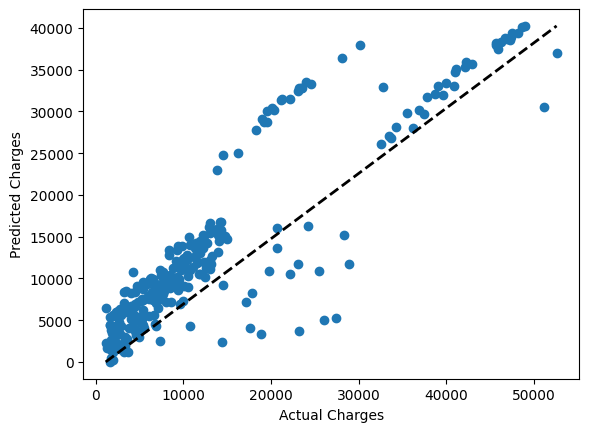

In [ ]:
plt.scatter(Y_test, predictions)
plt.plot([Y_test.min(), Y_test.max()], [predictions.min(),predictions.max()], 'k--', lw=2)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()